In [106]:
from torchvision import datasets, transforms
import torch.utils.data as data
from skimage import feature
import PIL
import numpy as np
import matplotlib.pyplot as plt

## HOG transform

In [107]:
class HOGTransform:
    def __init__(self):
        pass

    def __call__(self, img):
        img = img.squeeze(dim=0)
        _, img_hog = feature.hog(img, visualize = True)
        return img_hog

In [108]:
preprocess = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((256,256)),
    transforms.ToTensor(),
    HOGTransform()
])

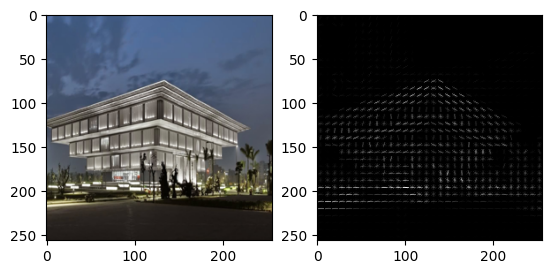

In [109]:
path = '/Users/mt/data/Landmark_Classification/train/bao_tang_ha_noi/604b38902328ac2a.jpg'

img = PIL.Image.open(path).resize((256, 256))
img_hog = preprocess(img)

_, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(img)
axes[1].imshow(img_hog, cmap=plt.cm.gray)

## Load train dataset, dataloader

In [110]:
path = '/Users/mt/data/Landmark_Classification/train/'

ds_train = datasets.ImageFolder(root=path, transform=preprocess)
ld_train = data.DataLoader(ds_train, batch_size=10)

(256, 256)


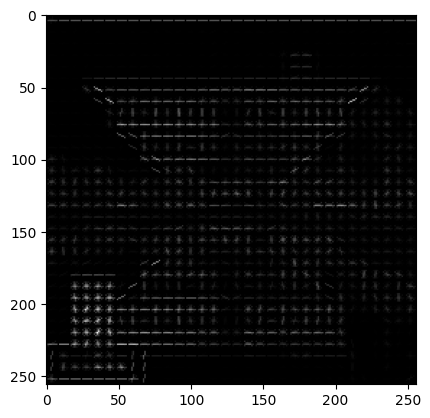

In [120]:
print(ds_train[0][0].shape)
plt.imshow(ds_train[0][0], cmap=plt.cm.gray)